In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
init_notebook_mode(connected = True)
cf.go_offline()

In [2]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

## <center>Описание задачи:</center>

    Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

    Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

### <center>Описание датасета</center>

    Посмотрим на переменные, которые содержит датасет:

1. school — аббревиатура школы, в которой учится ученик

2. sex — пол ученика ('F' - женский, 'M' - мужской)

3. age — возраст ученика (от 15 до 22)

4. address — тип адреса ученика ('U' - городской, 'R' - за городом)

5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. schoolsup — дополнительная образовательная поддержка (yes или no)

17. famsup — семейная образовательная поддержка (yes или no)

18. paid — дополнительные платные занятия по математике (yes или no)

19. activities — дополнительные внеучебные занятия (yes или no)

20. nursery — посещал детский сад (yes или no)

21. higher — хочет получить высшее образование (yes или no)

22. internet — наличие интернета дома (yes или no)

23. romantic — в романтических отношениях (yes или no)

24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. absences — количество пропущенных занятий

29. score — баллы по госэкзамену по математике

### Загружаем данные:

In [3]:
# загружаем наш датасет:

data = pd.read_csv('stud_math.csv')
display(data.sample(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,-3.0,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0
257,GP,M,19,U,LE3,A,4.0,3.0,services,at_home,reputation,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,1.0,1.0,12.0,55.0
113,GP,M,15,U,LE3,T,4.0,2.0,teacher,other,course,mother,1.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,yes,no,3.0,5.0,2.0,3.0,10.0,95.0
246,GP,M,17,U,GT3,T,2.0,3.0,other,other,course,father,2.0,1.0,0.0,no,NaN,NaN,no,yes,-3.0,yes,yes,no,5.0,2.0,2.0,2.0,4.0,65.0
209,GP,F,17,R,GT3,T,4.0,3.0,teacher,other,reputation,mother,2.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,4.0,4.0,2.0,4.0,6.0,35.0
228,GP,M,18,U,NaN,T,2.0,1.0,at_home,other,course,mother,4.0,2.0,0.0,yes,yes,yes,yes,yes,-6.0,yes,yes,yes,4.0,3.0,2.0,3.0,14.0,45.0
265,GP,M,18,R,LE3,NaN,3.0,4.0,NaN,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,2.0,5.0,1.0,NaN,85.0
179,GP,M,17,U,GT3,T,4.0,3.0,other,other,course,mother,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,yes,5.0,2.0,3.0,2.0,4.0,55.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0


In [4]:
display(data.info(verbose=True, null_counts=True)) # проверяем информацию о колонках датафрейма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

В описании датасета говорится о 29 колонках, а у нас их 30. Колонка <b><i>studytime, granular</i></b> "лишняя", надо будет разобраться какие данные в ней содержаться.

### "Входной" анализ данных:

В нашем датасете содержится 30 (хотя в описании всего 29) столбцов. Их можно разделить на несколько категорий:
1. Числовые: 3 столбца (age, absences, score)
2. 2 значения: 12 столбцов (sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic). Эти столбцы, после некоторых преобразований, можно считать бинарными.
3. Несколько "фиксированных" значений: 13 столбцов (Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health). Данные стобцы можно рассматривать как категориальные признаки.
4. Остальные значения: school и неизвестный нам столбец "studytime, granular".

In [5]:
# Переименуем столбцы для удобства дальнейшей работы:

data.rename(columns={'Pstatus': 'p_status', 'Medu':'m_edu', 'Fedu':'f_edu',
       'Mjob':'m_job', 'Fjob':'f_job', 'studytime, granular': 'studytime_gr'}, inplace=True)

In [6]:
# проверяем что не забыли какой-нибудь столбец:

display(data.info(verbose=True, null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        395 non-null    object 
 1   sex           395 non-null    object 
 2   age           395 non-null    int64  
 3   address       378 non-null    object 
 4   famsize       368 non-null    object 
 5   p_status      350 non-null    object 
 6   m_edu         392 non-null    float64
 7   f_edu         371 non-null    float64
 8   m_job         376 non-null    object 
 9   f_job         359 non-null    object 
 10  reason        378 non-null    object 
 11  guardian      364 non-null    object 
 12  traveltime    367 non-null    float64
 13  studytime     388 non-null    float64
 14  failures      373 non-null    float64
 15  schoolsup     386 non-null    object 
 16  famsup        356 non-null    object 
 17  paid          355 non-null    object 
 18  activities    381 non-null    

None

### Рассматриваем отдельные столбцы

#### Начнем с числовых признаков:

#### 1. age - возраст ученика

In [7]:
data.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

In [8]:
data.loc[:, ['age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

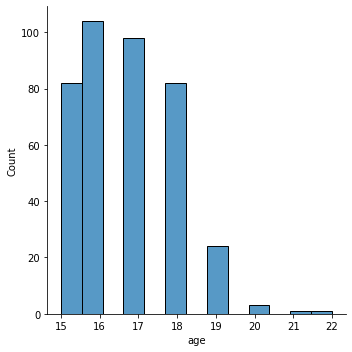

In [9]:
sns.displot(data.age)
data.age.describe()

В данном столбце пропусков нет, а все значения укладываются в ожидаемый диапазон от 15 до 22. Однако у нас всего по одному значению 21 и 22, которые, возможно, являются выбросами.
Проверим это:

Медиана: 17.0 
1-й квартиль: 16.0 
3-й квартиль: 18.0 
Межквартильный размах: 2.0 
Границы выбросов: [13.0, 21.0]


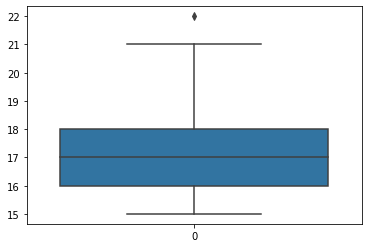

In [10]:
sns.boxplot(data = data.age)
med = data.age.median()
Q1 = data.age.quantile(0.25)
Q3 = data.age.quantile(0.75)
IQR = Q3 - Q1
print('Медиана: {} \n1-й квартиль: {} \n3-й квартиль: {} \nМежквартильный размах: {} \nГраницы выбросов: [{}, {}]'\
      .format(med, Q1, Q3, IQR, (Q1 - 1.5*IQR), (Q3 + 1.5*IQR)))

Видно что выбросом является только значение 22, значени 21 укладывается в диапазон. Однако, по условию задачи, возраст 22 является допустимым, поэтому мы не можем его просто так удалить.

In [11]:
# Посмотрим на распределение возраста подробнее:
data['age'].iplot(kind = 'histogram')

Видно что распределение имеет длинный "хвост" справа, учеников старше 18 лет совсем мало. Пока эта иформация нам ничего не дает, переходим к следующему столбцу.

#### 2. absences - количество пропущенных занятий

In [12]:
data.absences.value_counts()

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

In [13]:
data.loc[:, ['absences']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

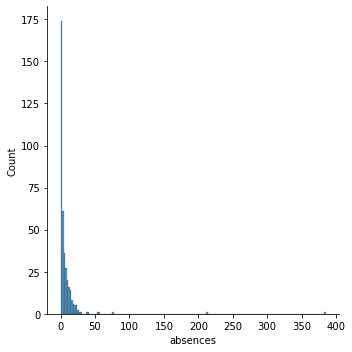

In [14]:
sns.displot(data.absences)
data.absences.describe()

В данном столбце присутствует слишком много различных значений, некоторые из которых явно являются выбросами. Так-же присутсвует 12 пустых значений.

Медиана: 4.0 
1-й квартиль: 0.0 
3-й квартиль: 8.0 
Межквартильный размах: 8.0 
Границы выбросов: [-12.0, 20.0]


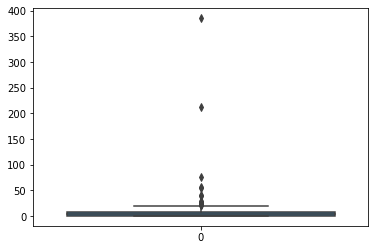

In [15]:
# Проверим наши догадки насчет выбросов:

sns.boxplot(data = data.absences)
med = data.absences.median()
Q1 = data.absences.quantile(0.25)
Q3 = data.absences.quantile(0.75)
IQR = Q3 - Q1
print('Медиана: {} \n1-й квартиль: {} \n3-й квартиль: {} \nМежквартильный размах: {} \nГраницы выбросов: [{}, {}]'\
      .format(med, Q1, Q3, IQR, (Q1 - 1.5*IQR), (Q3 + 1.5*IQR)))

Судя по всему выбросы в данных действительно есть, но совсем не факт что они вызваны ошибками в данных. Возможно, что столь большое количество пропусков вызвано болезнью или каким-либо иным подобным фактом. 
Кроме того мы не знаем сколько всего было занятий, а однозначно считать "аномальным" можно либо отрицательные значения, либо значения превышающие общее число занятий.
По боксплоту видно что у нас есть 2 слишком "оторванных" от остальных значения (больше 200). Предлагаю удалить только их, т.к. они могут в дальнейшем повлиять на результаты.

In [16]:
data.loc[data['absences'] >200, 'absences'] = np.nan

<AxesSubplot:>

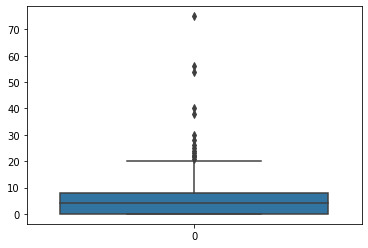

In [17]:
# Смотрим на изменившийся боксплот:

sns.boxplot(data = data.absences)

In [18]:
# Посмотрим на распределение пропусков подробнее:

data['absences'].iplot(kind = 'histogram')

Видно что распределение имеет длинный "хвост" справа. У большинства учеников либо вовсе нет пропусков, либо их количество невелико. После того как мы удалили 2 самых высоких значения в наших данных стало 14 пропусков. Заполнить их на данный момент не представляется возможным. Переходим к следующему столбцу.

#### 3. score - баллы по госэкзамену по математике

In [19]:
data.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

In [20]:
data.loc[:, ['score']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

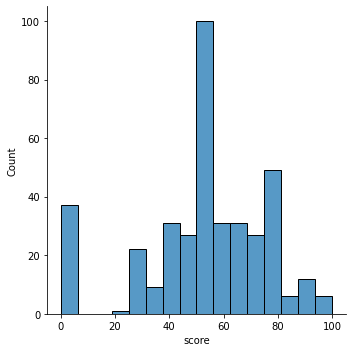

In [21]:
sns.displot(data.score, bins = 16)
data.score.describe()

Медиана: 55.0 
1-й квартиль: 40.0 
3-й квартиль: 70.0 
Межквартильный размах: 30.0 
Границы выбросов: [-5.0, 115.0]


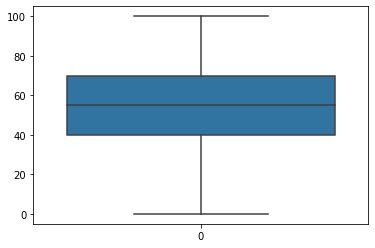

In [22]:
sns.boxplot(data = data.score)
med = data.score.median()
Q1 = data.score.quantile(0.25)
Q3 = data.score.quantile(0.75)
IQR = Q3 - Q1
print('Медиана: {} \n1-й квартиль: {} \n3-й квартиль: {} \nМежквартильный размах: {} \nГраницы выбросов: [{}, {}]'\
      .format(med, Q1, Q3, IQR, (Q1 - 1.5*IQR), (Q3 + 1.5*IQR)))

Судя по данным в столбце при оценке использовалась 100-бальная система. Присутствует 6 пустых значений. Выбросов формально нет, но, по гистограмме видно, что если отбросить нулевые значения (которые достаточно много и которые, вероятно, являются ошибкой), то распределение станет примерно нормальным.

In [23]:
# посмотрим на распределение без нуля
score_not_0 = data.score.apply(lambda x: x if x>0 else np.nan)

display(score_not_0.describe())
score_not_0.iplot(kind = 'histogram')

count    352.000000
mean      57.755682
std       16.200928
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Видно что распределение действительно стало "околонормальным" но слегка "приплюснутым". Такое распределение возникает из-за большого стандартного отклонения (std = 16.200928) и достаточно малого числа околомедианных значений.
Нулевые значения, хоть их и не мало, предлагаю считать ошибочными и удалить:

In [24]:
data.loc[data['score'] == 0, 'score'] = np.nan

In [25]:
# Перепроверим что получилось:

data.loc[:, ['score']].info()

data.score.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   352 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    352.000000
mean      57.755682
std       16.200928
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Нулевых значений (т.е. выбросов) не осталось, однако количество пустых значений увеличилось до 43. Распределение оценок мы уже проанализировали выше.

#### Теперь рассмотрим столбцы с неизвестным типом содержимого:

#### 1. school - аббревиатура школы, в которой учится ученик

In [26]:
data.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [27]:
data.loc[:, ['school']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


В нашем датасете всего 2 типа школ, так-что данный столбец можно отнести к бинарному типу. Кроме того столбец не содержит ни одного пропуска. 

#### 2. studytime_gr - столбец которого нет в описании датасета

In [28]:
data.studytime_gr.value_counts()

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime_gr, dtype: int64

In [29]:
data.loc[:, ['studytime_gr']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   studytime_gr  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_gr, dtype: float64

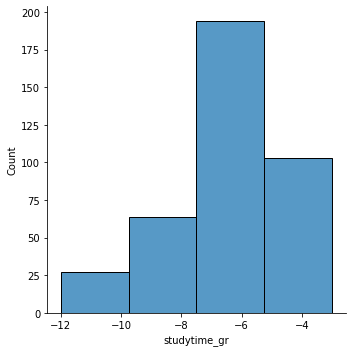

In [30]:
sns.displot(data.studytime_gr, bins = 4)
data.studytime_gr.describe()

Столбец содержит значения 4-ех типов и 7 пропусков. Пока мы ничего не можем сказать о том что он означает.

#### Переходим к категориальным признакам:

#### 1. m_edu - образование матери
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [31]:
data.m_edu.value_counts()

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: m_edu, dtype: int64

In [32]:
data.loc[:, ['m_edu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m_edu   392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


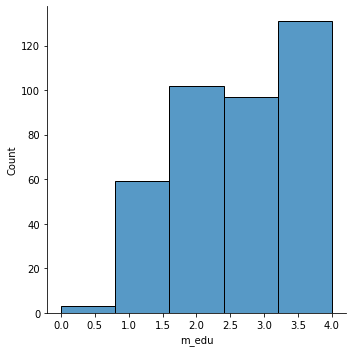

In [33]:
# посмотрим на распределение для данного столбца:

sns.displot(data.m_edu, bins = 5)

Столбец <b><i>m_edu</b></i> содержит 5 различных значений, как в описании. Есть 3 пустых значения. Можно заметить что значение 0 встречается всего 3 раза, но, т.к. по описанию датасета такой вариант допустим, то мы не будем считать его выбросом.

#### 2. f_edu - образование отца
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [38]:
data.f_edu.value_counts()

2.0    106
3.0     96
4.0     88
1.0     78
0.0      2
Name: f_edu, dtype: int64

In [35]:
data.loc[:, ['f_edu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_edu   371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Видно что в датасете есть одно неверное значение: 40. Данное значение является ошибочным, предлагаю его удалить:

In [36]:
data.loc[data['f_edu'] == 40.0, 'f_edu'] = np.nan

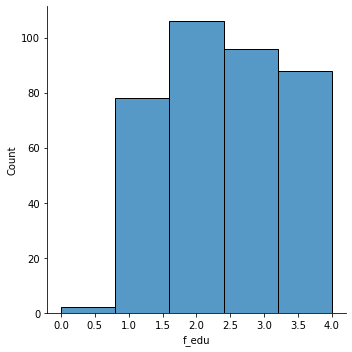

In [37]:
# Посмотрим на получившееся распределение:

sns.displot(data.f_edu, bins = 5)

В столбеце <b><i>f_edu</b></i> присутствовало одно ошибочное значение, которое мы удалили после чего получилось 25 пустых значений. Так-же как и с <b><i>m_edu</b></i> 0 встречается очень редко (2 раза).

#### 3. m_job - работа матери

In [42]:
data.m_job.value_counts()

other       133
services     98
at_home      58
teacher      55
health       32
Name: m_job, dtype: int64

In [43]:
data.loc[:, ['m_job']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   m_job   376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


В столбеце <b><i>m_job</b></i> содержится 5 значений, как в описании. Ошибочных значений нет, но присутсвует 19 пустых значений.

#### 4. f_job - работа отца

In [47]:
data.f_job.value_counts()

other       197
services    102
teacher      29
at_home      16
health       15
Name: f_job, dtype: int64

In [48]:
data.loc[:, ['f_job']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f_job   359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Также как и с <b><i>m_job</b></i> столбец <b><i>f_job</b></i> содержит 5 значений. Ошибок в данных нет, но пустых значений стало больше (35).

#### 5. reason - причина выбора школы

In [49]:
data.reason.value_counts()

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

In [50]:
data.loc[:, ['reason']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


В столбце <b><i>reason</b></i> содержится 4 значения, как в описании. Ошибочных значений нет, присутсвует 17 пустых значений.

#### 6. guardian — опекун

In [52]:
data.guardian.value_counts()

mother    250
father     86
other      28
Name: guardian, dtype: int64

In [53]:
data.loc[:, ['guardian']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


В столбце <b><i>guardian</b></i> содержится 3 значения, как в описании. Ошибочных значений нет, присутсвует 31 пустое значение.

#### 7. traveltime - время в пути до школы
(1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [55]:
data.traveltime.value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

In [56]:
data.loc[:, ['traveltime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


В столбце <b><i>traveltime</b></i> содержится 4 значения, как в описании. Ошибочных значений нет, присутсвует 28 пустых значений.

#### 8. studytime - время на учёбу помимо школы в неделю 
(1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [57]:
data.studytime.value_counts()

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

In [58]:
data.loc[:, ['studytime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [61]:
# Мы уже видели похожее распределение в столбце studytime_gr. Надо рассмотреть 2 столбца вместе:

data.loc[:,['studytime','studytime_gr']]

,studytime,studytime_gr
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
...,...,...
390,2.0,-6.0
391,1.0,-3.0
392,1.0,-3.0
393,1.0,-3.0


In [62]:
# Похоже что столбец studytime_gr это просто studytime, умноженный на -3. 
# Что-бы убедиться в этом, можно проверить корреляцию между ними:

data['studytime'].corr(data['studytime_gr'])

-1.0

In [63]:
# Значение 1 (по модулю) говорит нам о полной корреляции между столбцами, а значит один из них можно спокойно удалить: 

data.drop(['studytime_gr'], inplace = True, axis = 1)

Cтолбец <b><i>studytime</b></i> содержится 4 значения, как в описании. Ошибочных значений нет, присутсвует 7 пустых значений. Помимо этого мы выяснили что неизвестный нам столбец <b><i>studytime_gr</b></i> оказался всего-лишь копией столбца <b><i>studytime</b></i>, умноженной на -3, что позволило нам удалить его.

#### 9. failures — количество внеучебных неудач 
(n, если 1<=n<=3, иначе 0)